In [1]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objects as go

In [5]:
# Load data
df = pd.read_excel("data.xlsx")
df.head()

,family,division,sub-division,language
0,Indo-European,Romance,Ibero-Romance,Galician and Portuguese
1,Indo-European,Romance,Ibero-Romance,Asturian and Leonese
2,Indo-European,Romance,Ibero-Romance,Spanish and Castilian
3,Indo-European,Romance,Ibero-Romance,Upper Aragonese
4,Indo-European,Romance,Ibero-Romance,Judeo-Spanish and Ladino


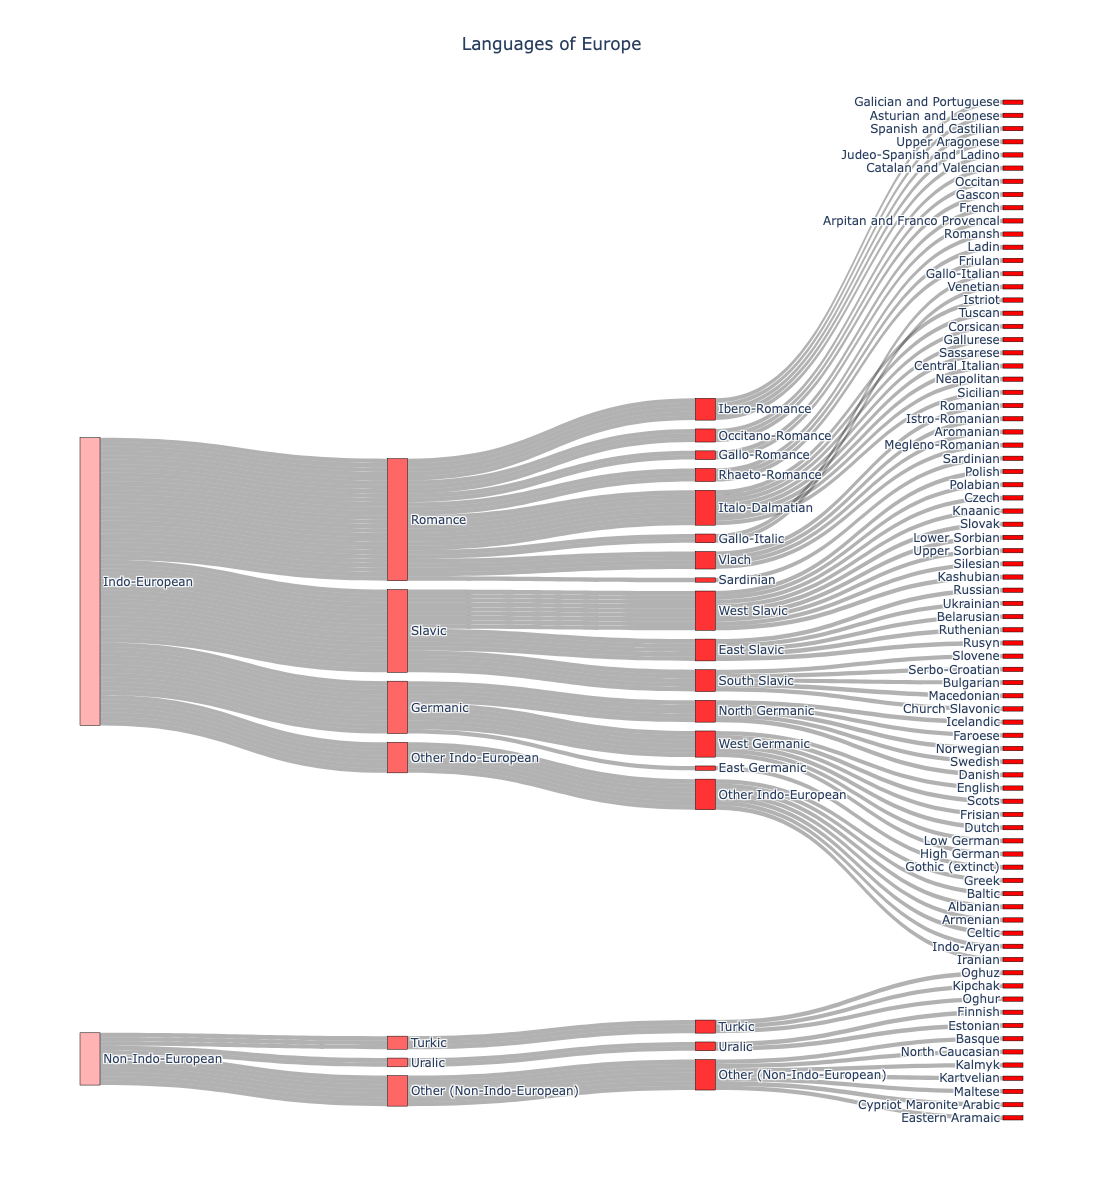

In [9]:
# Preprocess the data to prepare the nodes and links for the Sankey diagram
def create_sankey_data(df):
    # Create unique identifiers for family, division, sub-division, and language
    unique_families = df['family'].unique()
    unique_divisions = df['division'].unique()
    unique_sub_divisions = df['sub-division'].unique()
    unique_languages = df['language'].unique()

    # Create node list
    nodes = list(unique_families) + list(unique_divisions) + list(unique_sub_divisions) + list(unique_languages)

    # Create mappings from categories to node indices
    family_indices = {family: idx for idx, family in enumerate(unique_families)}
    division_indices = {division: idx + len(unique_families) for idx, division in enumerate(unique_divisions)}
    sub_division_indices = {sub_division: idx + len(unique_families) + len(unique_divisions) for idx, sub_division in enumerate(unique_sub_divisions)}
    language_indices = {language: idx + len(unique_families) + len(unique_divisions) + len(unique_sub_divisions) for idx, language in enumerate(unique_languages)}

    return nodes, family_indices, division_indices, sub_division_indices, language_indices

def prepare_links(df, family_indices, division_indices, sub_division_indices, language_indices):
    sources = []
    targets = []
    values = []
    
    # Add links for each row in the dataset
    for _, row in df.iterrows():
        family_idx = family_indices[row['family']]
        division_idx = division_indices[row['division']]
        sub_division_idx = sub_division_indices[row['sub-division']]
        language_idx = language_indices[row['language']]

        # Add the links from family -> division -> sub-division -> language
        sources.extend([family_idx, division_idx, sub_division_idx])
        targets.extend([division_idx, sub_division_idx, language_idx])
        values.extend([1, 1, 1])  # Default value (1) for each connection
        
    return sources, targets, values

def plot_sankey(nodes, sources, targets, values):
    # Define a color palette for the nodes, using a gradient of colors for different levels
    node_colors = [
        "#FFB3B3",  # Family (light pink)
        "#FF6666",  # Division (medium red)
        "#FF3333",  # Sub-division (darker red)
        "#FF0000",  # Language (darkest red)
    ]
    
    # Assign colors dynamically for each level based on the node type
    colors = []
    for i, node in enumerate(nodes):
        if i < len(family_indices):
            colors.append(node_colors[0])  # Family color
        elif i < len(family_indices) + len(division_indices):
            colors.append(node_colors[1])  # Division color
        elif i < len(family_indices) + len(division_indices) + len(sub_division_indices):
            colors.append(node_colors[2])  # Sub-division color
        else:
            colors.append(node_colors[3])  # Language color

    # Create a Sankey plot
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes,
            color=colors,  # Apply the color scheme
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color="rgba(0, 0, 0, 0.3)"  # Subtle link color
        )
    ))

    # Update layout with centered title and export options
    fig.update_layout(
        title_text="Languages of Europe",
        title_x=0.5,  # Center the title
        font_size=12,
        height=1200,  # Increase the height for better visibility
        width=1200,  # Increase the width for better layout
    )

    # Export the figure as a PNG file
    fig.write_image("sankey_diagram.png")

    # Show the plot
    fig.show()

# Execute the functions to prepare and plot the Sankey diagram
nodes, family_indices, division_indices, sub_division_indices, language_indices = create_sankey_data(df)
sources, targets, values = prepare_links(df, family_indices, division_indices, sub_division_indices, language_indices)

# Plot the Sankey Diagram with enhanced appearance and colors, and export as PNG
plot_sankey(nodes, sources, targets, values)